In [1]:
import os

In [2]:
os.chdir('../dependencies/')

In [3]:
import pandas as analytics
import numpy as maths
import matplotlib.pyplot as graph
from linear_regression import linear_regression
from math import exp

In [4]:
class logistic_regression:
    def __init__(self,filename, alphas, number_of_iterations, training_perc, threshold = 0.5) : 
        self.filename = filename
        self.threshold = threshold
        self.alphas = alphas
        self.k = number_of_iterations
        self.training_perc = training_perc
        self.load_data()
        
    def load_data(self):
        df_data = analytics.read_csv(filename+".csv")
        names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
        df_data = analytics.read_csv(filename+".csv" , names = names)
        df_data['x0'] = 1
        cols = list(df_data.columns)
        cols = [cols[-1]] + list(cols[:-1])
        df_data = df_data[cols]
        df_data['y'] = df_data['y'].replace(-1,0)

        df_data_changed = df_data.drop(['x0','y'],axis = 1)
        df_data_changed['y']  = 0
        df_data_changed.to_csv(filename+'_changed.csv',index=False,header=False)
        self.df_data = df_data
        self.find_weights()
        
    
    def find_weights(self):
        lr = linear_regression()
        lr.load_data(filename+'_changed.csv')
        lr.monte_carlo(self.alphas,self.k,self.training_perc)
        training_set , testing_set = lr.split_data()
        lr.train( training_set , sgd  = True, plot_rmse = False , plot_metrics = False )
        lr.test(testing_set)
        self.maxima = lr.maxima
        self.minima = lr.minima
        self.w_star = lr.w_star
        self.predict()
        
    def predict(self):
        df_data = self.df_data
        if 'y_pred' in df_data.columns : df_data = df_data.drop('y_pred',axis=1)
        x = df_data.iloc[:,:-1]
        for col in range(len(self.minima)):
            x.iloc[:,col] = (x.iloc[:,col] - self.minima[col]) / (self.maxima[col] - self.minima[col])
        y_pred = []
        for i in range(len(df_data)):
            y_pred.append(self.logit(x.iloc[i]))
        y_pred = [1 if y > self.threshold else 0 for y in y_pred]
        df_data['y_pred'] = y_pred
        self.create_confusion_matrix(df_data['y'],df_data['y_pred'])
        self.df_data = df_data
        
        
    def bernoullis_distribution(self,x):
        db = maths.matmul(self.w_star.T,x)
        denominator = 1 + exp(-db)
        return 1/denominator

    def logit(self,x):
        x = maths.matrix(x)
        f_x = self.bernoullis_distribution(x.T)
        return (f_x)/(1-f_x)

    def create_confusion_matrix(self,y,y_pred):
        tp = 0
        fp = 0
        tn = 0
        fn = 0
        for i in range(len(y)):
            if y[i] == y_pred[i] == 1:
                tp = tp + 1
            elif y[i] == y_pred[i] == 0:
                tn = tn + 1
            elif y[i] == 1 and y_pred[i] == 0:
                fn = fn + 1
            else :
                fp = fp + 1

        conf_mat = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
        print("Confusion Matrix : ",conf_mat)
        self.confusion_matrix = conf_mat
        accuracy = self.find_accuracy()
        precision = self.find_precision()
        sensitivity = self.find_sensitivity()
        specificity = self.find_specificity()
        fscore = self.find_fscore()
 

    def find_precision(self,show = True):
        conf_mat = self.confusion_matrix
        precision = round((conf_mat['tp'])/(conf_mat['fp']+conf_mat['tp'])*100,2) 
        if show : print("Precision : ",precision,"%")
        return precision

    def find_accuracy(self, show = True):
        conf_mat = self.confusion_matrix
        accuracy = round((conf_mat['tp']+conf_mat['fp'])/(conf_mat['tp'] + conf_mat['tn'] + conf_mat['fp'] + conf_mat['fn'])*100,2)
        if show : print("Accuracy : ",accuracy,"%")
        return accuracy

    def find_sensitivity(self,show = True):
        conf_mat = self.confusion_matrix
        sensitivity = round((conf_mat['tp'])/(conf_mat['tp']+conf_mat['fn'])*100,2)
        if show : print("Sensivity : ",sensitivity,"%")
        return sensitivity

    def find_specificity(self,show = True):
        conf_mat = self.confusion_matrix
        specificity = round((conf_mat['tn'])/(conf_mat['fp']+conf_mat['tn'])*100,2)
        if show : print("Specificity : ",specificity,"%")
        return specificity

    def find_fscore(self,show=True):
        conf_mat = self.confusion_matrix
        f_score = round(2/((1/self.find_precision(False))+(1/self.find_sensitivity(False)))*100,2)
        if show : print("F1 Score : ",f_score,"%")
        return f_score        


For iteration number  1  : 
	Average RMSE for alpha :  0.0  :  52.272050109116456
	Average RMSE for alpha :  0.1  :  0.4570888422078888
	Average RMSE for alpha :  0.2  :  0.409770606700974
	Average RMSE for alpha :  0.30000000000000004  :  0.47714341212753714
	Average RMSE for alpha :  0.4  :  0.3498970215528242
	Average RMSE for alpha :  0.5  :  0.6027049391803107
	Average RMSE for alpha :  0.6000000000000001  :  0.7164668711035292
	Average RMSE for alpha :  0.7000000000000001  :  0.16317807224707068
	Average RMSE for alpha :  0.8  :  0.6496277742331331
	Average RMSE for alpha :  0.9  :  0.5903472762201322

For iteration number  2  : 
	Average RMSE for alpha :  0.0  :  124.3945026600767
	Average RMSE for alpha :  0.1  :  0.33197625776343714
	Average RMSE for alpha :  0.2  :  0.20273824429932985
	Average RMSE for alpha :  0.30000000000000004  :  0.49095395633828487
	Average RMSE for alpha :  0.4  :  0.24527161538987152
	Average RMSE for alpha :  0.5  :  0.22125804221058767
	Average RMS

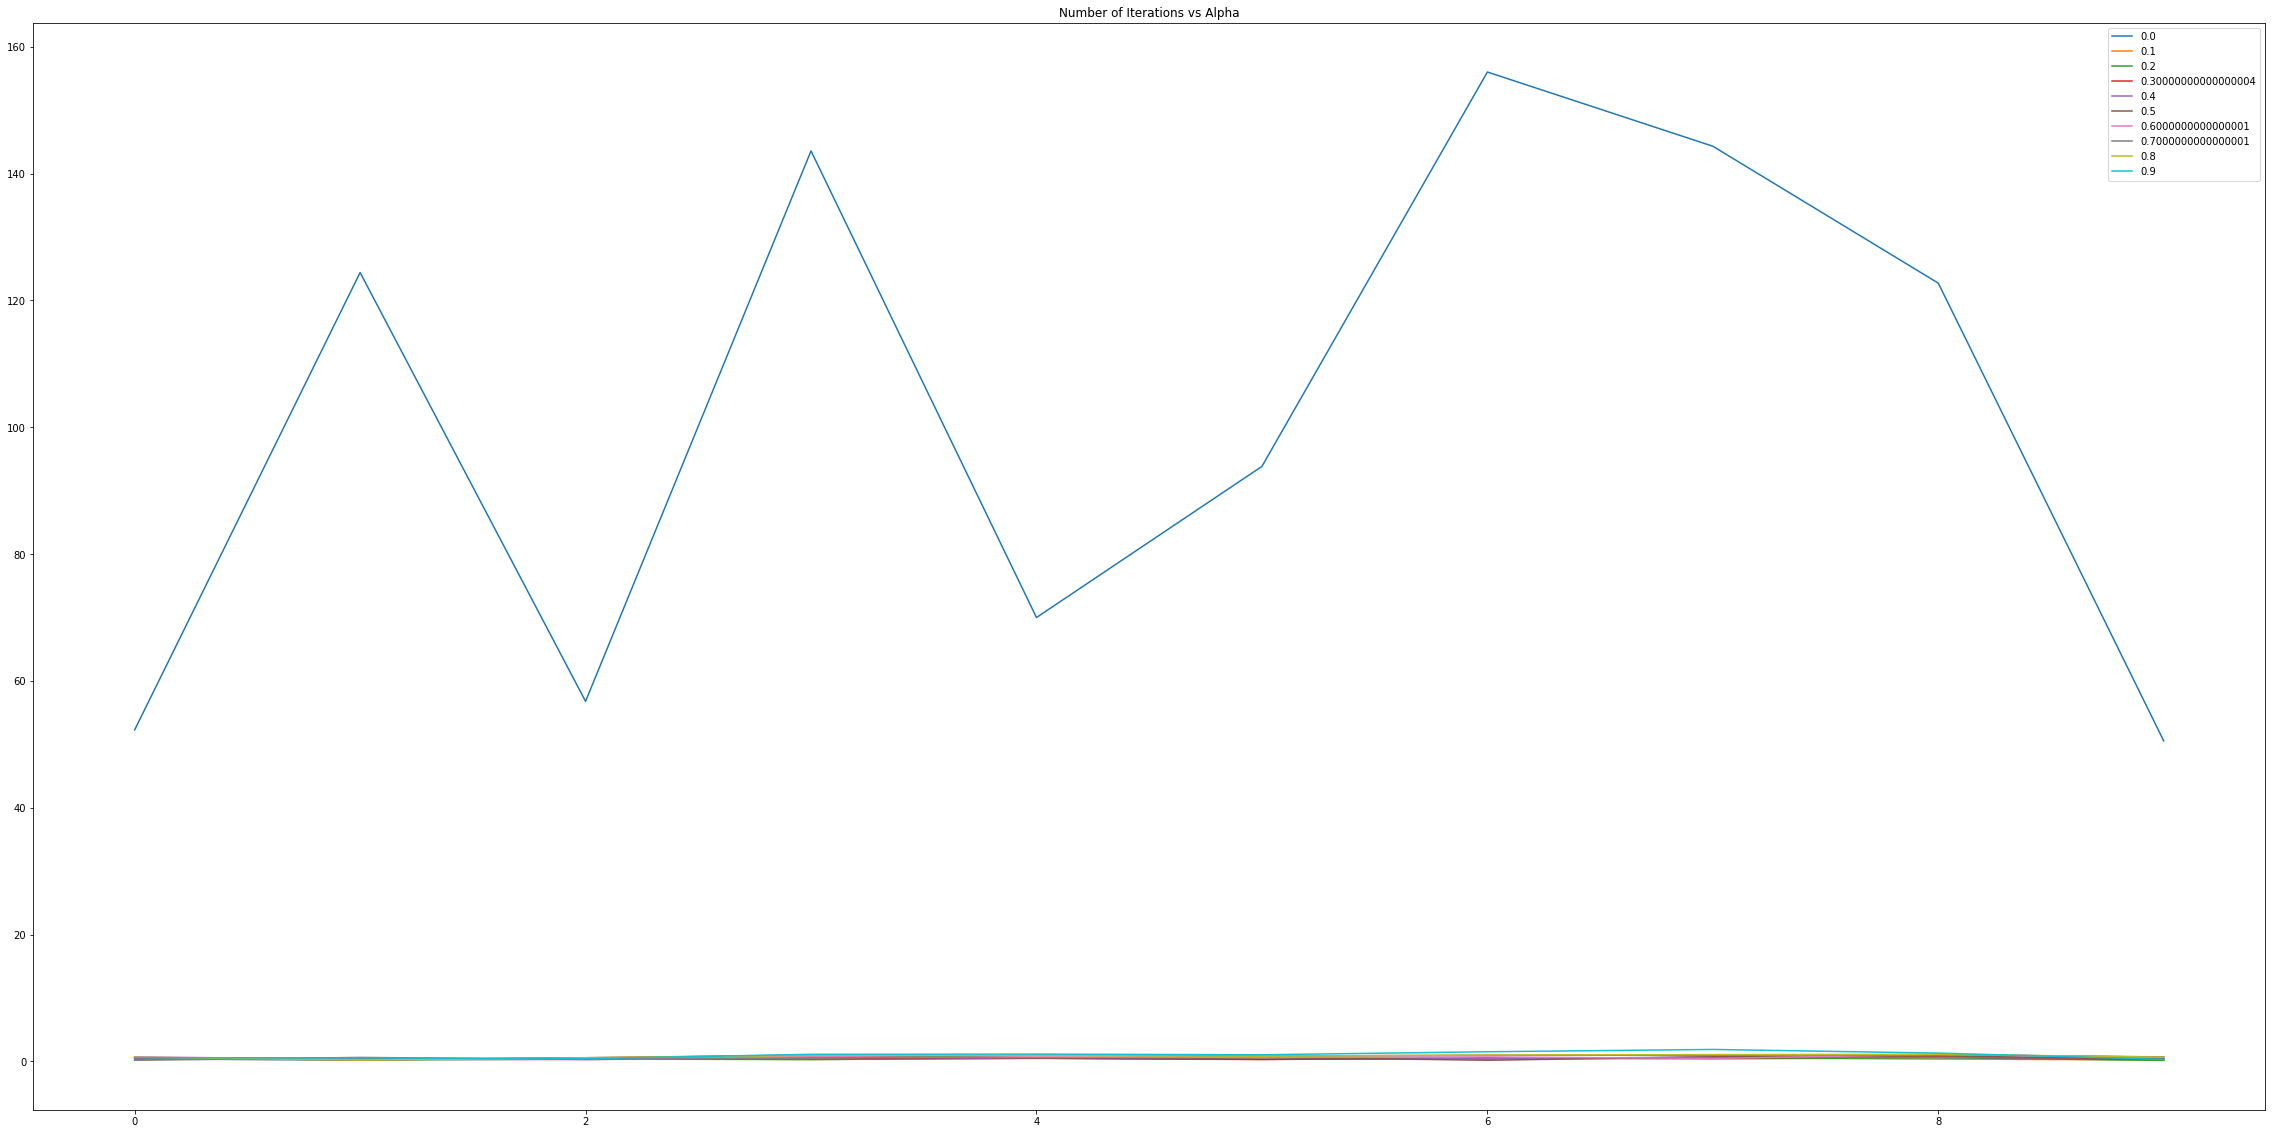

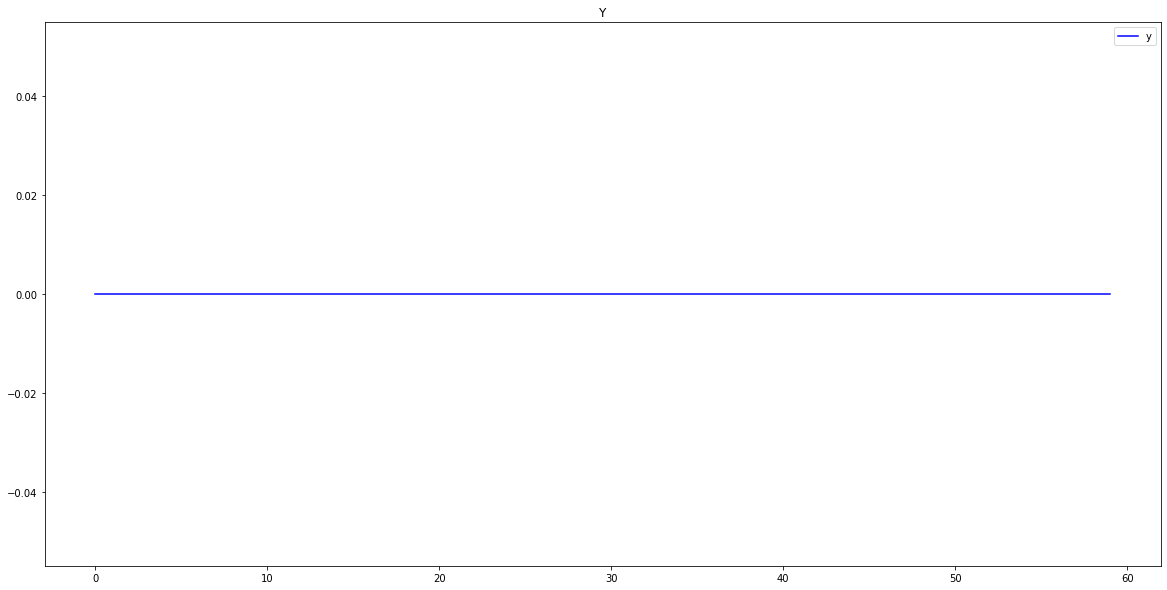

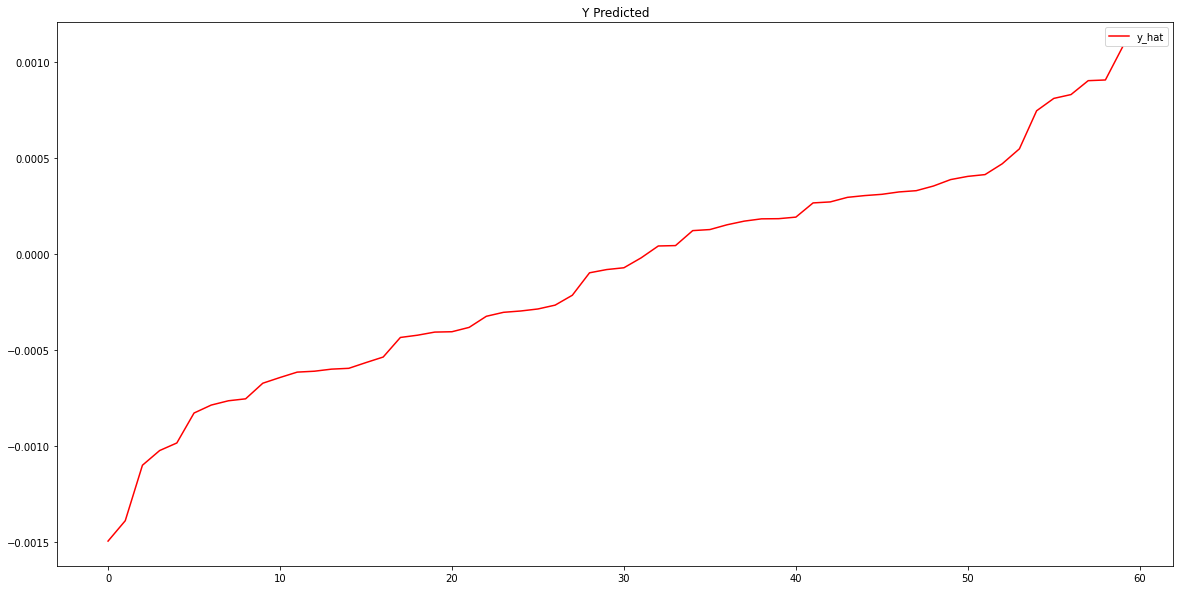

In [5]:
filename = '../data/data3'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7


lr = logistic_regression(filename = filename , alphas = alphas , number_of_iterations = number_of_iterations ,
                         training_perc = training_perc )

# New Workings

$$ w = (X^TX)^{-1}X^TY $$

In [5]:
# filename = filename
# threshold = threshold
# alphas = alphas
# k = number_of_iterations
# training_perc = training_perc

def load_data():
    df_data = analytics.read_csv(filename+".csv")
    names = ['x'+str(i+1) for i in range((df_data.shape[1])-1)] + ['y']
    df_data = analytics.read_csv(filename+".csv" , names = names)
    df_data['x0'] = 1
    cols = list(df_data.columns)
    cols = [cols[-1]] + list(cols[:-1])
    df_data = df_data[cols]
    df_data['y'] = df_data['y'].replace(-1,0)

#     df_data_changed = df_data.drop(['x0','y'],axis = 1)
#     df_data_changed['y']  = 0
#     df_data_changed.to_csv(filename+'_changed.csv',index=False,header=False)
#     df_data = df_data
    return df_data
    #     find_weights()


def find_weights():
    lr = linear_regression()
    lr.load_data(filename+'_changed.csv')
    lr.monte_carlo(alphas,k,training_perc)
    training_set , testing_set = lr.split_data()
    lr.train( training_set , sgd  = True, plot_rmse = False , plot_metrics = False )
    lr.test(testing_set)
    maxima = lr.maxima
    minima = lr.minima
    w_star = lr.w_star
    predict()

def predict():
    df_data = df_data
    if 'y_pred' in df_data.columns : df_data = df_data.drop('y_pred',axis=1)
    x = df_data.iloc[:,:-1]
    for col in range(len(minima)):
        x.iloc[:,col] = (x.iloc[:,col] - minima[col]) / (maxima[col] - minima[col])
    y_pred = []
    for i in range(len(df_data)):
        y_pred.append(logit(x.iloc[i]))
    y_pred = [1 if y > threshold else 0 for y in y_pred]
    df_data['y_pred'] = y_pred
    create_confusion_matrix(df_data['y'],df_data['y_pred'])
    df_data = df_data


def bernoullis_distribution(x):
    db = maths.matmul(w_star.T,x)
    denominator = 1 + exp(-db)
    return 1/denominator

def logit(x):
    x = maths.matrix(x)
    f_x = bernoullis_distribution(x.T)
    return (f_x)/(1-f_x)

def create_confusion_matrix(y,y_pred):
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for i in range(len(y)):
        if y[i] == y_pred[i] == 1:
            tp = tp + 1
        elif y[i] == y_pred[i] == 0:
            tn = tn + 1
        elif y[i] == 1 and y_pred[i] == 0:
            fn = fn + 1
        else :
            fp = fp + 1

    conf_mat = {'tp':tp,'tn':tn,'fp':fp,'fn':fn}
    print("Confusion Matrix : ",conf_mat)
    confusion_matrix = conf_mat
    accuracy = find_accuracy()
    precision = find_precision()
    sensitivity = find_sensitivity()
    specificity = find_specificity()
    fscore = find_fscore()


def find_precision(show = True):
    conf_mat = confusion_matrix
    precision = round((conf_mat['tp'])/(conf_mat['fp']+conf_mat['tp'])*100,2) 
    if show : print("Precision : ",precision,"%")
    return precision

def find_accuracy( show = True):
    conf_mat = confusion_matrix
    accuracy = round((conf_mat['tp']+conf_mat['fp'])/(conf_mat['tp'] + conf_mat['tn'] + conf_mat['fp'] + conf_mat['fn'])*100,2)
    if show : print("Accuracy : ",accuracy,"%")
    return accuracy

def find_sensitivity(show = True):
    conf_mat = confusion_matrix
    sensitivity = round((conf_mat['tp'])/(conf_mat['tp']+conf_mat['fn'])*100,2)
    if show : print("Sensivity : ",sensitivity,"%")
    return sensitivity

def find_specificity(show = True):
    conf_mat = confusion_matrix
    specificity = round((conf_mat['tn'])/(conf_mat['fp']+conf_mat['tn'])*100,2)
    if show : print("Specificity : ",specificity,"%")
    return specificity

def find_fscore(show=True):
    conf_mat = confusion_matrix
    f_score = round(2/((1/find_precision(False))+(1/find_sensitivity(False)))*100,2)
    if show : print("F1 Score : ",f_score,"%")
    return f_score        


In [6]:
filename = '../data/data3'
alphas = maths.arange(0,1,0.1)
number_of_iterations = 10
training_perc = 0.7


In [7]:
df_data = load_data()

In [8]:
df_data

,x0,x1,x2,y
0,1,-0.69736,-3.6535,1
1,1,-4.82200,-7.6336,1
2,1,-8.23430,-7.5536,1
3,1,-6.07640,-11.3800,1
4,1,-10.73600,-14.3760,1
...,...,...,...,...
195,1,8.22200,4.8614,0
196,1,11.64300,5.3394,0
197,1,8.16510,10.1410,0
198,1,14.25700,9.0196,0


In [9]:
validation_perc = 0.7 
validation_numbers = int(validation_perc * len(df_data))

In [10]:
df_data = df_data.sample(frac = 1)
df_validation = df_data[:validation_numbers]
df_test = df_data[validation_numbers:]

In [11]:
training_perc = 0.7
training_number = int(training_perc * len(df_validation))

In [12]:
df_validation = df_validation.sample(frac = 1)
df_validation_train = df_validation[:training_number]
df_validation_test = df_validation[training_number:]
df_validation_train

,x0,x1,x2,y
164,1,12.0210,7.8002,0
57,1,-11.2930,-11.4210,1
142,1,13.0440,8.7199,0
23,1,-11.9550,-10.0550,1
34,1,-13.6920,-5.6660,1
...,...,...,...,...
153,1,13.7600,7.3335,0
111,1,8.5146,7.4314,0
171,1,13.9830,6.9809,0
101,1,7.6591,6.6082,0


In [13]:
w_star = maths.matrix(maths.random.randint(0,10,len(df_validation_train.columns) - 1))
w_star = w_star.T
w_star

matrix([[7],
        [0],
        [7]])

In [14]:
maximas = []
minimas = []
for col in df_validation_train.columns[1:-1]:
    maximum = max(df_validation_train[col])
    minimum = min(df_validation_train[col])    
    diff = maximum - minimum
    df_validation_train[col] = (df_validation_train[col] - minimum) / diff
    df_validation_test[col] = (df_validation_test[col] - minimum) / diff
    df_test[col] = (df_test[col] - minimum) / diff
df_validation_train

,x0,x1,x2,y
164,1,0.823018,0.790907,0
57,1,0.177397,0.236775,1
142,1,0.851347,0.817422,0
23,1,0.159065,0.276155,1
34,1,0.110963,0.402687,1
...,...,...,...,...
153,1,0.871175,0.777453,0
111,1,0.725917,0.780275,0
171,1,0.877350,0.767287,0
101,1,0.702226,0.756543,0


In [57]:
def sigmoid(w_star,x):
    db = float(maths.matmul(w_star.T,x))
    print('db',db)
    denominator = 1 + exp(-db)
    return 1/denominator

def logit(w_star , x):
    f_x = sigmoid(w_star,x)
    if f_x == 1 : ratio = 0
    else : ratio = (f_x)/(1-f_x)
    return ratio

In [58]:
def gradient_descent(data):
    X = data.iloc[:,:-1]
    Y = data.iloc[:,-1]
    w_star = maths.matrix(maths.random.randint(0,10,X.shape[1])).T
    y_pred = []
    alpha = 0.1
    w_old = w_star + 1
    epsilon = 1e-3
    
    while maths.linalg.norm(w_star - w_old) >= epsilon:

        for row in range(len(X)):
            x = maths.matrix(X.iloc[row]).T
            y_pred.append(logit(w_star,x))
            w_star = w_star - alpha*((float(Y.iloc[row]) - y_pred[row]))*x

    data['y_pred'] = y_pred
    return w_star, data
    
    

In [59]:
data = df_validation_train
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]
w_star = maths.matrix(maths.random.randint(0,10,X.shape[1])).T
y_pred = []
alpha = 0.2
w_old = w_star + 1
epsilon = 1e-3

while maths.linalg.norm(w_star - w_old) >= epsilon:
    print('Norm of w', maths.linalg.norm(w_star-w_old))
    for row in range(len(X)):
        x = maths.matrix(X.iloc[row]).T
        y_pred.append(logit(w_star,x))
        
        w_star = w_star + alpha*(Y.iloc[row] - y_pred[row])*x

data['y_pred'] = y_pred

Norm of w 1.7320508075688772
db 9.696904097532656
db -4332.338369022687


OverflowError: math range error

In [196]:
Y.iloc[row] - y_pred[row]

195802.11327565592

In [162]:
gradient_descent(df_validation_train)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 4 is different from 1)